**Data Understanding**

Let's first load the data and understand the attributes meanings, shape of the dataset etc.


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import validation_curve
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
train_data = pd.read_csv("/content/sign_mnist_test.csv") #reading the csv files using pandas
test_data = pd.read_csv("/content/sign_mnist_train.csv")

In [ ]:
train_data.shape # print the dimension or shape of train data

(5179, 785)

In [ ]:
test_data.shape # print the dimension or shape of test data

(1380, 785)

In [ ]:
train_data.head() # printing first five columns of train_data

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,...,138.0,148.0,127.0,89.0,82.0,96.0,106.0,112.0,120.0,107.0
1,5,126,128,131,132,133,134,135,135,136,...,47.0,104.0,194.0,183.0,186.0,184.0,184.0,184.0,182.0,180.0
2,10,85,88,92,96,105,123,135,143,147,...,68.0,166.0,242.0,227.0,230.0,227.0,226.0,225.0,224.0,222.0
3,0,203,205,207,206,207,209,210,209,210,...,154.0,248.0,247.0,248.0,253.0,236.0,230.0,240.0,253.0,255.0
4,3,188,191,193,195,199,201,202,203,203,...,26.0,40.0,64.0,48.0,29.0,46.0,49.0,46.0,46.0,53.0


test_data.shape # print the dimension or shape of test data

In [ ]:
test_data.head() # printing first five columns of test_data

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207.0,207.0,207.0,207.0,206.0,206.0,206.0,204.0,203.0,202.0
1,6,155,157,156,156,156,157,156,158,158,...,69.0,149.0,128.0,87.0,94.0,163.0,175.0,103.0,135.0,149.0
2,2,187,188,188,187,187,186,187,188,187,...,202.0,201.0,200.0,199.0,198.0,199.0,198.0,195.0,194.0,195.0
3,2,211,211,212,212,211,210,211,210,210,...,235.0,234.0,233.0,231.0,230.0,226.0,225.0,222.0,229.0,163.0
4,13,164,167,170,172,176,179,180,184,185,...,92.0,105.0,105.0,108.0,133.0,163.0,157.0,163.0,164.0,179.0


In [ ]:
# there are no missing values in the dataset

train_data.isnull().sum().head(10)

label     0
pixel1    0
pixel2    0
pixel3    0
pixel4    0
pixel5    0
pixel6    0
pixel7    0
pixel8    0
pixel9    0
dtype: int64

In [ ]:

test_data.isnull().sum().head(10)

label     0
pixel1    0
pixel2    0
pixel3    0
pixel4    0
pixel5    0
pixel6    0
pixel7    0
pixel8    0
pixel9    0
dtype: int64

In [ ]:
test_data.describe()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,1380.000000,1380.000000,1380.000000,1380.000000,1380.000000,1380.000000,1380.000000,1380.000000,1380.000000,1380.000000,...,1379.000000,1379.000000,1379.000000,1379.000000,1379.000000,1379.000000,1379.000000,1379.000000,1379.000000,1379.000000
mean,12.286232,146.946377,150.026087,152.725362,154.899275,157.728986,159.691304,161.634058,163.359420,164.959420,...,144.468455,150.100798,154.676577,159.467005,162.230602,162.557650,162.501813,161.544598,160.133430,158.857143
std,7.236096,41.320657,39.888814,38.639188,37.937824,35.926448,35.301319,34.308440,33.223481,31.894061,...,64.561125,64.782482,63.243842,63.260888,64.333733,64.204579,64.273831,64.226592,64.159891,64.628091
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,6.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,124.000000,128.000000,131.750000,135.000000,138.000000,141.000000,143.750000,145.750000,147.000000,...,93.000000,98.500000,105.000000,113.500000,119.500000,125.500000,126.000000,126.500000,126.000000,121.000000
50%,13.000000,152.000000,154.000000,157.000000,159.000000,160.000000,163.000000,164.000000,165.000000,166.000000,...,153.000000,166.000000,173.000000,180.000000,184.000000,185.000000,186.000000,184.000000,183.000000,182.000000
75%,19.000000,176.000000,177.000000,179.000000,181.000000,182.000000,184.000000,185.000000,185.250000,186.000000,...,200.000000,204.000000,205.000000,207.000000,208.000000,208.000000,208.000000,207.000000,206.000000,204.500000
max,24.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000


In [ ]:
train_data.describe()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,5179.000000,5179.000000,5179.000000,5179.000000,5179.000000,5179.000000,5179.000000,5179.000000,5179.000000,5179.000000,...,5178.000000,5178.000000,5178.000000,5178.000000,5178.000000,5178.000000,5178.000000,5178.000000,5178.000000,5178.000000
mean,11.278239,147.187295,150.127052,153.064105,155.451245,157.944391,160.585634,162.105040,163.478664,165.416297,...,138.111819,144.952684,150.388567,155.494786,158.943801,159.693704,158.240633,157.895326,157.051951,155.283121
std,7.427882,43.460980,41.719975,40.230517,39.088876,37.578084,35.894901,35.929679,35.770492,33.566933,...,64.037867,65.141171,65.830048,65.622280,65.197829,65.402450,66.259725,65.778551,66.923614,67.908185
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,0.000000,0.000000,9.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,121.000000,125.000000,130.000000,134.000000,137.000000,141.000000,143.000000,145.000000,147.000000,...,90.000000,95.000000,98.250000,105.000000,113.000000,114.000000,113.000000,116.000000,113.000000,110.000000
50%,11.000000,154.000000,156.000000,158.000000,161.000000,163.000000,165.000000,166.000000,168.000000,169.000000,...,135.000000,155.000000,167.000000,176.500000,181.000000,181.000000,181.000000,180.000000,180.000000,179.000000
75%,18.000000,178.000000,179.000000,180.000000,182.000000,183.000000,185.000000,186.000000,186.000000,187.000000,...,194.000000,200.000000,204.000000,207.000000,208.000000,208.000000,207.000000,206.000000,206.000000,204.000000
max,24.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000


In [ ]:
# about the dataset

# dimensions
print("Dimensions: ",test_data.shape, "\n")

# data types
print(test_data.info())

# head
test_data.head()

Dimensions:  (1380, 785) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1380 entries, 0 to 1379
Columns: 785 entries, label to pixel784
dtypes: float64(770), int64(15)
memory usage: 8.3 MB
None


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207.0,207.0,207.0,207.0,206.0,206.0,206.0,204.0,203.0,202.0
1,6,155,157,156,156,156,157,156,158,158,...,69.0,149.0,128.0,87.0,94.0,163.0,175.0,103.0,135.0,149.0
2,2,187,188,188,187,187,186,187,188,187,...,202.0,201.0,200.0,199.0,198.0,199.0,198.0,195.0,194.0,195.0
3,2,211,211,212,212,211,210,211,210,210,...,235.0,234.0,233.0,231.0,230.0,226.0,225.0,222.0,229.0,163.0
4,13,164,167,170,172,176,179,180,184,185,...,92.0,105.0,105.0,108.0,133.0,163.0,157.0,163.0,164.0,179.0


In [ ]:
# about the dataset

# dimensions
print("Dimensions: ",train_data.shape, "\n")

# data types
print(train_data.info())

# head
train_data.head()

Dimensions:  (5179, 785) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5179 entries, 0 to 5178
Columns: 785 entries, label to pixel784
dtypes: float64(368), int64(417)
memory usage: 31.0 MB
None


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,...,138.0,148.0,127.0,89.0,82.0,96.0,106.0,112.0,120.0,107.0
1,5,126,128,131,132,133,134,135,135,136,...,47.0,104.0,194.0,183.0,186.0,184.0,184.0,184.0,182.0,180.0
2,10,85,88,92,96,105,123,135,143,147,...,68.0,166.0,242.0,227.0,230.0,227.0,226.0,225.0,224.0,222.0
3,0,203,205,207,206,207,209,210,209,210,...,154.0,248.0,247.0,248.0,253.0,236.0,230.0,240.0,253.0,255.0
4,3,188,191,193,195,199,201,202,203,203,...,26.0,40.0,64.0,48.0,29.0,46.0,49.0,46.0,46.0,53.0


In [ ]:
print(train_data.columns)
print(test_data.columns)

Index(['label', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6',
       'pixel7', 'pixel8', 'pixel9',
       ...
       'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779', 'pixel780',
       'pixel781', 'pixel782', 'pixel783', 'pixel784'],
      dtype='object', length=785)
Index(['label', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6',
       'pixel7', 'pixel8', 'pixel9',
       ...
       'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779', 'pixel780',
       'pixel781', 'pixel782', 'pixel783', 'pixel784'],
      dtype='object', length=785)


In [ ]:
order = list(np.sort(train_data['label'].unique()))
print(order)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]


Text(0.5, 1.0, 'Digit 4')

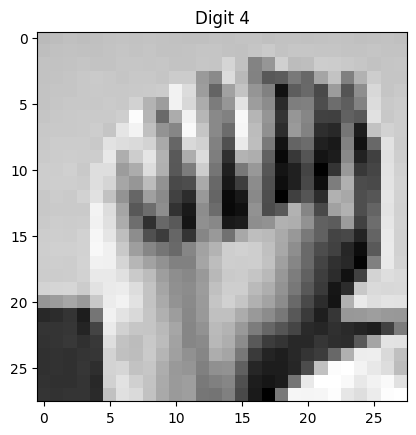

In [ ]:
# Plotting some samples as well as converting into matrix
four = train_data.iloc[3, 1:]
four.shape
four = four.values.reshape(28,28)
plt.imshow(four, cmap='gray')
plt.title("Digit 0")

********Data Preparation**

Let's conduct some data preparation steps before modeling. Firstly, let's see if it is important to rescale the features, since they may have varying ranges.


In [ ]:
# average feature values
round(train_data.drop('label', axis=1).mean(), 2)

pixel1      147.19
pixel2      150.13
pixel3      153.06
pixel4      155.45
pixel5      157.94
             ...  
pixel780    159.69
pixel781    158.24
pixel782    157.90
pixel783    157.05
pixel784    155.28
Length: 784, dtype: float64

In this case, the average values do not vary a lot (e.g. having a diff of an order of magnitude). Nevertheless, it is better to rescale them.

In [ ]:
## Separating the X and Y variable

y = train_data['label']

## Dropping the variable 'label' from X variable
X = train_data.drop(columns = 'label')

## Printing the size of data
print(train_data.shape)

(5179, 785)


In [ ]:
## Normalization

X = X/255.0
test_data = test_data/255.0

print("X:", X.shape)
print("test_data:", test_data.shape)

X: (5179, 784)
test_data: (1380, 785)


In [ ]:
# scaling the features
from sklearn.preprocessing import scale
X_scaled = scale(X)

# train test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.3, train_size = 0.2 ,random_state = 10)

******Model Building**

Let's fist build two basic models - linear and non-linear with default hyperparameters, and compare the accuracies.


In [ ]:
# linear model

model_linear = SVC(kernel='linear')
model_linear.fit(X_train, y_train)

# predict
y_pred = model_linear.predict(X_test)

In [ ]:
# confusion matrix and accuracy

from sklearn import metrics
from sklearn.metrics import confusion_matrix
# accuracy
print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred), "\n")

# cm
print(metrics.confusion_matrix(y_true=y_test, y_pred=y_pred))

accuracy: 0.9768339768339769 

[[ 68   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  0  83   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  0   0  63   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  0   0   0  52   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  0   0   0   0 113   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  0   0   0   0   0  53   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  0   0   0   0   0   0  69   5   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  0   0   0   0   0   0   0  96   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  74   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  78   0   0   0   0   

In [ ]:
# creating a KFold object with 5 splits
folds = KFold(n_splits = 5, shuffle = True, random_state = 10)

# specify range of hyperparameters
# Set the parameters by cross-validation
hyper_params = [ {'gamma': [1e-2, 1e-3, 1e-4],
                     'C': [5,10]}]


# specify model
model = SVC(kernel="rbf")

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = model,
                        param_grid = hyper_params,
                        scoring= 'accuracy',
                        cv = folds,
                        verbose = 1,
                        return_train_score=True)

# fit the model
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=10, shuffle=True),
             estimator=SVC(),
             param_grid=[{'C': [5, 10], 'gamma': [0.01, 0.001, 0.0001]}],
             return_train_score=True, scoring='accuracy', verbose=1)

In [ ]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.310584,0.009529,0.110520,0.007368,5,0.01,"{'C': 5, 'gamma': 0.01}",0.739130,0.797101,0.657005,...,0.721739,0.047980,5,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
1,0.271931,0.041994,0.121584,0.024096,5,0.001,"{'C': 5, 'gamma': 0.001}",0.961353,0.961353,0.917874,...,0.946860,0.018332,2,0.998792,0.998792,0.998792,0.998792,1.000000,0.999034,0.000483
2,0.210265,0.033863,0.121443,0.020857,5,0.0001,"{'C': 5, 'gamma': 0.0001}",0.758454,0.816425,0.753623,...,0.800966,0.041151,4,0.882850,0.893720,0.894928,0.894928,0.881643,0.889614,0.006043
3,0.302241,0.006735,0.115894,0.002912,10,0.01,"{'C': 10, 'gamma': 0.01}",0.739130,0.797101,0.657005,...,0.721739,0.047980,5,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
4,0.230415,0.025039,0.100807,0.020362,10,0.001,"{'C': 10, 'gamma': 0.001}",0.961353,0.961353,0.922705,...,0.947826,0.018685,1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
5,0.219370,0.029130,0.142715,0.018010,10,0.0001,"{'C': 10, 'gamma': 0.0001}",0.903382,0.884058,0.879227,...,0.898551,0.014653,3,0.962560,0.950483,0.969807,0.966184,0.956522,0.961111,0.006891
